# 1) Import Libraries

In [707]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [708]:
df = pd.read_csv("mumbai.csv")

In [709]:
df.head(1)

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,22400000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",629.0,19.0328,72.896357,2.0,2.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Right fr...,35612.082671


# 2) Data Cleaning

In [710]:
df.columns

Index(['price', 'Address', 'area', 'latitude', 'longitude', 'Bedrooms',
       'Bathrooms', 'Balcony', 'Status', 'neworold', 'parking',
       'Furnished_status', 'Lift', 'Landmarks', 'type_of_building', 'desc',
       'Price_sqft'],
      dtype='object')

In [711]:
df.shape

(6255, 17)

In [712]:
df.duplicated().sum()

0

In [713]:
df.isnull().sum()

price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony             3879
Status               481
neworold               0
parking             4126
Furnished_status    2655
Lift                4577
Landmarks           3638
type_of_building       0
desc                   0
Price_sqft             0
dtype: int64

In [714]:
df.describe()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
count,6.255000e+03,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,2376.000000,2129.000000,1678.000000,6255.000000
mean,2.684187e+07,1185.625260,19.156772,72.868642,2.452278,2.425580,2.162879,4.662283,2.448153,21422.923601
std,2.788831e+07,636.973259,0.109447,0.058614,0.749534,0.762604,1.221899,35.780057,1.566455,12698.478665
min,1.500000e+06,503.000000,18.873713,72.754080,2.000000,0.000000,1.000000,1.000000,0.000000,1500.000000
25%,1.300000e+07,846.500000,19.081509,72.832930,2.000000,2.000000,1.000000,1.000000,2.000000,13709.934735
50%,1.900000e+07,1000.000000,19.147269,72.858019,2.000000,2.000000,2.000000,1.000000,2.000000,19285.714286
75%,3.000000e+07,1300.000000,19.213054,72.884691,3.000000,3.000000,3.000000,2.000000,3.000000,26500.000000
max,3.600000e+08,8000.000000,19.476239,73.197823,10.000000,10.000000,8.000000,801.000000,10.000000,119047.619048


In [715]:
df.describe(include="O")

,Address,Status,neworold,Furnished_status,Landmarks,type_of_building,desc
count,6255,5774,6255,3600,2617,6255,6255
unique,3632,2,2,3,2555,2,3445
top,"Mira Road, Mumbai - Mira Road and Beyond, Maha...",Ready to Move,Resale,Unfurnished,Country Club,Flat,\n
freq,154,5771,5515,1384,4,5828,2581


In [716]:
df.drop(columns=['latitude','longitude','desc','Landmarks'],inplace=True)

In [717]:
df.corr()

C:\Users\Aniket\AppData\Local\Temp\ipykernel_260\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,area,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
price,1.000000,0.712270,0.586444,0.639180,0.085394,-0.026116,0.226564,0.725421
area,0.712270,1.000000,0.709704,0.709748,0.168306,-0.022351,0.346959,0.178343
Bedrooms,0.586444,0.709704,1.000000,0.813488,0.132794,0.000979,0.194092,0.259073
Bathrooms,0.639180,0.709748,0.813488,1.000000,0.149155,-0.003092,0.279875,0.307079
Balcony,0.085394,0.168306,0.132794,0.149155,1.000000,-0.010921,0.107074,-0.072887
parking,-0.026116,-0.022351,0.000979,-0.003092,-0.010921,1.000000,-0.040054,-0.028804
Lift,0.226564,0.346959,0.194092,0.279875,0.107074,-0.040054,1.000000,0.061350
Price_sqft,0.725421,0.178343,0.259073,0.307079,-0.072887,-0.028804,0.061350,1.000000


In [718]:
#df = df[['price','area','Bedrooms','Bathrooms','Balcony','Lift','parking','Address','Status','neworold','Furnished_status','type_of_building','Price_sqft']]

In [719]:
df.skew()

C:\Users\Aniket\AppData\Local\Temp\ipykernel_260\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


price          4.402213
area           3.660917
Bedrooms       2.462564
Bathrooms      2.344295
Balcony        0.942455
parking       15.782868
Lift           1.755837
Price_sqft     1.833248
dtype: float64

## Filling NAN values

In [720]:
df.isnull().sum()

price                  0
Address                0
area                   0
Bedrooms               0
Bathrooms              0
Balcony             3879
Status               481
neworold               0
parking             4126
Furnished_status    2655
Lift                4577
type_of_building       0
Price_sqft             0
dtype: int64

### (i) Balcony

In [721]:
df['Balcony'].skew()

0.9424550994651261

In [722]:
df['Balcony'].replace(np.nan,0,inplace=True)

In [723]:
df['Balcony'].value_counts()

0.0    3879
1.0     949
2.0     583
3.0     468
4.0     297
5.0      56
6.0      12
7.0       8
8.0       3
Name: Balcony, dtype: int64

In [724]:
#balcony = df['Balcony'].value_counts()
#balcony_count = balcony[balcony < 100]
#df['Balcony'] = df['Balcony'].apply(lambda x: 'Other' if x in balcony_count else x)

In [725]:
#df['Balcony'].value_counts()

In [726]:
#df.drop(df[df['Balcony']=='Other'].index,axis=0,inplace=True)

In [727]:
#df['Balcony'] = pd.to_numeric(df['Balcony'])

### (ii) Status

In [728]:
df['Status'].replace(np.nan,'Ready to Move',inplace=True)

In [729]:
df['Status'].value_counts()

Ready to Move         6252
Under Construction       3
Name: Status, dtype: int64

### (iii) Parking

In [730]:
df['parking'].replace(np.nan,0,inplace=True)

In [731]:
df['parking'].value_counts()

0.0      4126
1.0      1421
2.0       509
3.0        87
4.0        33
5.0         9
10.0        9
20.0        5
12.0        4
18.0        3
30.0        3
6.0         3
14.0        2
15.0        2
9.0         2
401.0       2
7.0         2
40.0        2
104.0       2
105.0       2
11.0        2
205.0       2
65.0        1
24.0        1
601.0       1
22.0        1
60.0        1
26.0        1
801.0       1
102.0       1
302.0       1
125.0       1
55.0        1
418.0       1
101.0       1
21.0        1
702.0       1
163.0       1
202.0       1
150.0       1
185.0       1
75.0        1
603.0       1
8.0         1
16.0        1
Name: parking, dtype: int64

In [732]:
parking = df['parking'].value_counts()
parking_count = parking[parking < 50]
df['parking'] = df['parking'].apply(lambda x: 'Other' if x in parking_count else x)

In [733]:
df['parking'].value_counts()

0.0      4126
1.0      1421
2.0       509
Other     112
3.0        87
Name: parking, dtype: int64

In [734]:
df.drop(df[df['parking']=='Other'].index,axis=0,inplace=True)

In [735]:
df['parking'] = pd.to_numeric(df['parking'])

### (iv) Furnished Status

In [736]:
df['Furnished_status'].mode()

0    Unfurnished
Name: Furnished_status, dtype: object

Text(0.5, 1.0, 'Status vs Price')

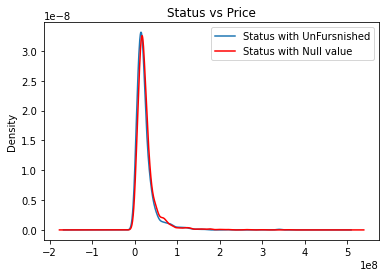

In [737]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['Furnished_status']=='Unfurnished']['price'].plot(kind='kde',ax=ax)

df[df['Furnished_status'].isnull()]['price'].plot(kind='kde',ax=ax,color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Status with UnFursnished','Status with Null value']
ax.legend(lines, labels, loc='best')

plt.title('Status vs Price')

In [738]:
df['Furnished_status'].replace(np.nan,'Unfurnished',inplace=True)

### (vi) Bedrooms

In [739]:
df['Bedrooms'].value_counts()

2.0     4042
3.0     1651
4.0      349
5.0       66
6.0       22
7.0        8
8.0        3
10.0       2
Name: Bedrooms, dtype: int64

In [740]:
#bedroom = df['Bedrooms'].value_counts()
#bedroom_count = bedroom[bedroom < 100]
#df['Bedrooms'] = df['Bedrooms'].apply(lambda x: 'Other' if x in bedroom_count else x)

In [741]:
#df.drop(df[df['Bedrooms']=='Other'].index,axis=0,inplace=True)

In [742]:
#df['Bedrooms'] = pd.to_numeric(df['Bedrooms'])

### (vii) Bathrooms

In [743]:
df['Bathrooms'].value_counts()

2.0     4273
3.0     1367
4.0      374
5.0       97
6.0       23
7.0        5
8.0        2
10.0       1
0.0        1
Name: Bathrooms, dtype: int64

In [744]:
#bathrooms = df['Bathrooms'].value_counts()
#bathrooms_count = bathrooms[bathrooms < 50]
#df['Bathrooms'] = df['Bathrooms'].apply(lambda x: 'Other' if x in bathrooms_count else x)

In [745]:
#df.drop(df[df['Bathrooms']=='Other'].index,axis=0,inplace=True)

In [746]:
#df['Bathrooms'] = pd.to_numeric(df['Bathrooms'])

### (v) Lift

In [747]:
df['Lift'].median()

2.0

In [748]:
df['Lift'].replace(np.nan,2.0,inplace=True)

In [749]:
df['Lift'].value_counts()

2.0     5272
1.0      306
3.0      214
4.0      165
0.0       51
5.0       48
6.0       48
7.0       18
8.0       10
10.0       8
9.0        3
Name: Lift, dtype: int64

In [750]:
lift = df['Lift'].value_counts()
lift_count = lift[lift < 50]
df['Lift'] = df['Lift'].apply(lambda x: 'Other' if x in lift_count else x)

In [751]:
df.drop(df[df['Lift']=='Other'].index,axis=0,inplace=True)
df['Lift'] = pd.to_numeric(df['Lift'])

In [752]:
df.drop(df[df['type_of_building']=='Individual House'].index,axis=0,inplace=True)

In [753]:
df.skew()

C:\Users\Aniket\AppData\Local\Temp\ipykernel_260\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


price         4.178106
area          3.510615
Bedrooms      2.390677
Bathrooms     2.233694
Balcony       1.579769
parking       1.597719
Lift          1.144069
Price_sqft    1.878081
dtype: float64

##  Extracing Station Name from Address

In [754]:
df.head(1)

,price,Address,area,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft
0,22400000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",629.0,2.0,2.0,0.0,Under Construction,New Property,0.0,Unfurnished,2.0,Flat,35612.082671


From Address column, we have to fetch the name of different stations.

In [755]:
# Finding the Length of Address column after split
#len(df['Address'].str.split(",")[1])

In [756]:
df[df['Address'].apply(lambda x : len(x.split(",")) >=3) == False]

,price,Address,area,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft
896,27000000.0,"Mumbai, Maharashtra",786.0,2.0,2.0,3.0,Ready to Move,Resale,0.0,Unfurnished,2.0,Flat,34351.145038
3043,4300000.0,"Mumbai, Maharashtra",745.0,2.0,2.0,3.0,Ready to Move,Resale,0.0,Unfurnished,2.0,Flat,5771.812081
3425,35000000.0,"Mumbai, Maharashtra",1350.0,3.0,3.0,0.0,Ready to Move,Resale,0.0,Semi-Furnished,2.0,Flat,25925.925926
3780,6700000.0,"Mumbai, Maharashtra",800.0,2.0,2.0,0.0,Ready to Move,Resale,0.0,Unfurnished,2.0,Flat,8375.000000
3792,6000000.0,"Mumbai - Western Suburbs, Maharashtra",775.0,2.0,2.0,0.0,Ready to Move,Resale,0.0,Unfurnished,2.0,Flat,7741.935484
3872,6500000.0,"Mumbai, Maharashtra",990.0,2.0,2.0,1.0,Ready to Move,New Property,0.0,Unfurnished,2.0,Flat,6565.656566


In [757]:
df.drop(df[df['Address']=='Mumbai, Maharashtra'].index,axis=0,inplace=True)
df.drop(df[df['Address']=='Mumbai - Western Suburbs, Maharashtra'].index,axis=0,inplace=True)

In [758]:
# Fetch the station name
df['City_area'] = df['Address'].str.split(',').apply(lambda x: x[-3])

In [759]:
df['City_area'] = df['City_area'].apply(lambda x: x.strip())

In [760]:
df['City_area'].nunique()

598

In [761]:
df['City_area'].replace("Goregaon East","Goregaon",inplace=True)
df['City_area'].replace("Goregaon West","Goregaon",inplace=True)

df['City_area'].replace("Vasai West","Vasai",inplace=True)
df['City_area'].replace("Vasai East","Vasai",inplace=True)

df['City_area'].replace("Khar Danda","Khar",inplace=True)
df['City_area'].replace("Khar West","Khar",inplace=True)
df['City_area'].replace("Khar East","Khar",inplace=True)

df['City_area'].replace("Geeta Nagar","Bhayandar",inplace=True)
df['City_area'].replace("Bhayandar West","Bhayandar",inplace=True)
df['City_area'].replace("Bhayandar East","Bhayandar",inplace=True)

df['City_area'].replace("Kurla West","Kurla",inplace=True)
df['City_area'].replace("Kurla East","Kurla",inplace=True)
df['City_area'].replace("Nehru Nagar","Kurla",inplace=True)

df['City_area'].replace("Tagore Nagar","Vikhroli",inplace=True)
df['City_area'].replace("Vikhroli East","Vikhroli",inplace=True)
df['City_area'].replace("Vikhroli West","Vikhroli",inplace=True)

df['City_area'].replace("Malad East","Malad",inplace=True)
df['City_area'].replace("Malad West","Malad",inplace=True)

In [762]:
df['City_area'].replace("Bhulabhai Desai Marg","Vikroli",inplace=True)
df['City_area'].replace("Vikroli","Vikhroli",inplace=True)

In [763]:
df['City_area'].replace("New Tilak Nagar - Kurla East","Kurla",inplace=True)
df['City_area'].replace("Govandi Station Road","Govandi",inplace=True)
df['City_area'].replace("Kings Circle","Matunga",inplace=True)
df['City_area'].replace("Navi Mumbai-Khargar-Panvel-Ulwe","Navi Mumbai",inplace=True)

In [764]:
df['City_area'].replace("Byculla East","Byculla",inplace=True)
df['City_area'].replace("Byculla West","Byculla",inplace=True)

df['City_area'].replace("Lower Parel West","Lower Parel",inplace=True)
df['City_area'].replace("Lower Parel East","Lower Parel",inplace=True)

df['City_area'].replace("Mahim West","Mahim",inplace=True)
df['City_area'].replace("Mahim East","Mahim",inplace=True)

df['City_area'].replace("Matunga East","Matunga",inplace=True)
df['City_area'].replace("Matunga West","Matunga",inplace=True)

df['City_area'].replace("Naigaon East","Naigaon",inplace=True)
df['City_area'].replace("Naigaon West","Naigaon",inplace=True)

df['City_area'].replace("Nahur East","Nahur",inplace=True)
df['City_area'].replace("Nahur West","Nahur",inplace=True)

In [765]:
df['City_area'].replace("Thane-Kalyan-Dombivli","Thane",inplace=True)
df['City_area'].replace("Balkum Pada - Majiwada","Thane",inplace=True)
df['City_area'].replace("Bhiwendi","Thane",inplace=True)

In [766]:
df['City_area'].replace("Bhoiwada - Parel","Parel",inplace=True)
df['City_area'].replace("Parmanand Wadi","Parel",inplace=True)
df['City_area'].replace("Tilak Nagar - Parel","Parel",inplace=True)

In [767]:
df['City_area'].replace("Hiranandani Gardens","Powai",inplace=True)
df['City_area'].replace("Central Area","Powai",inplace=True)
df['City_area'].replace("Raheja Vihar","Powai",inplace=True)
df['City_area'].replace("Chandivali","Powai",inplace=True)
df['City_area'].replace("Rambaug","Powai",inplace=True)
df['City_area'].replace("Powai lake","Powai",inplace=True)
df['City_area'].replace("MHADA Colony - Chandivali","Powai",inplace=True)

In [768]:
df['City_area'].replace("Byculla East","Byculla",inplace=True)
df['City_area'].replace("Byculla West","Byculla",inplace=True)
df['City_area'].replace("Agripada","Byculla",inplace=True)
df['City_area'].replace("Mustafa Bazar","Byculla",inplace=True)

In [769]:
df['City_area'].replace("Charni Road","Mumbai Central",inplace=True)
df['City_area'].replace("Grant Road","Mumbai Central",inplace=True)
df['City_area'].replace("Napean Sea Road","Mumbai Central",inplace=True)
df['City_area'].replace("Malabar Hill","Mumbai Central",inplace=True)
df['City_area'].replace("Cuffe Parade","Mumbai Central",inplace=True)
df['City_area'].replace("Tardeo","Mumbai Central",inplace=True)
df['City_area'].replace("Mahalakshmi","Mumbai Central",inplace=True)
df['City_area'].replace("Lal Baug","Mumbai Central",inplace=True)
df['City_area'].replace("Lokhandwala Twp","Mumbai Central",inplace=True)
df['City_area'].replace("Walkeshwar","Mumbai Central",inplace=True)
df['City_area'].replace("Peddar Road","Mumbai Central",inplace=True)
df['City_area'].replace("Marine Drive","Mumbai Central",inplace=True)
df['City_area'].replace("Breach Candy","Mumbai Central",inplace=True)
df['City_area'].replace("Marine Lines","Mumbai Central",inplace=True)
df['City_area'].replace("Worli Sea Face","Mumbai Central",inplace=True)
df['City_area'].replace("Worli","Mumbai Central",inplace=True)

df['City_area'].replace("Khetwadi","Mumbai Central",inplace=True)
df['City_area'].replace("Prabhadevi","Mumbai Central",inplace=True)
df['City_area'].replace("Nagpada","Mumbai Central",inplace=True)
df['City_area'].replace("Kemps Corner","Mumbai Central",inplace=True)
df['City_area'].replace("Pydhonie","Mumbai Central",inplace=True)
df['City_area'].replace("Juhu Tara Road","Mumbai Central",inplace=True)
df['City_area'].replace("Colaba","Mumbai Central",inplace=True)
df['City_area'].replace("Juhu Beach Area","Mumbai Central",inplace=True)
df['City_area'].replace("Girgaon","Mumbai Central",inplace=True)
df['City_area'].replace("Juhu","Mumbai Central",inplace=True)
df['City_area'].replace("Colaba","Mumbai Central",inplace=True)
df['City_area'].replace("Dongri","Mumbai Central",inplace=True)
df['City_area'].replace("Hughes Road","Mumbai Central",inplace=True)
df['City_area'].replace("Chira Bazaar","Mumbai Central",inplace=True)
df['City_area'].replace("Chunabhatti","Mumbai Central",inplace=True)
df['City_area'].replace("World Trade Centre","Mumbai Central",inplace=True)
df['City_area'].replace("Mumbai","Mumbai Central",inplace=True)
df['City_area'].replace("Lamington Rd","Mumbai Central",inplace=True)
df['City_area'].replace("Chowpatty","Mumbai Central",inplace=True)
df['City_area'].replace("Saki Vihar Road","Mumbai Central",inplace=True)
df['City_area'].replace("Kalbadevi","Mumbai Central",inplace=True)
df['City_area'].replace("Nariman Point","Mumbai Central",inplace=True)
df['City_area'].replace("Thakurdwar","Mumbai Central",inplace=True)
df['City_area'].replace("BR Ambedkar Chowk","Mumbai Central",inplace=True)
df['City_area'].replace("Masjid Bandar","Mumbai Central",inplace=True)
df['City_area'].replace("Cumballa Hill","Mumbai Central",inplace=True)
df['City_area'].replace("Crawford Market","Mumbai Central",inplace=True)
df['City_area'].replace("Mahalaxmi Race Course","Mumbai Central",inplace=True)
df['City_area'].replace("Church Gate","Mumbai Central",inplace=True)
df['City_area'].replace("Shantivan","Mumbai Central",inplace=True)
df['City_area'].replace("Bhuleshwar","Mumbai Central",inplace=True)
df['City_area'].replace("Sikka Nagar","Mumbai Central",inplace=True)
df['City_area'].replace("Carter Road","Mumbai Central",inplace=True)
df['City_area'].replace("Opera House","Mumbai Central",inplace=True)
df['City_area'].replace("Mohd Ali Road","Mumbai Central",inplace=True)
df['City_area'].replace("Mandvi","Mumbai Central",inplace=True)

In [770]:
df['City_area'].replace("Virar East","Virar",inplace=True)
df['City_area'].replace("Virar West","Virar",inplace=True)
df['City_area'].replace("Bolinj","Virar",inplace=True)
df['City_area'].replace("Virat Nagar","Virar",inplace=True)
df['City_area'].replace("Y K Nagar","Virar",inplace=True)
df['City_area'].replace("Agashi","Virar",inplace=True)

In [771]:
df['City_area'].replace("Vinay Nagar","Mira Road",inplace=True)
df['City_area'].replace("Beverly Park","Mira Road",inplace=True)
df['City_area'].replace("Ramdev Park","Mira Road",inplace=True)
df['City_area'].replace("Poonam Gardens","Mira Road",inplace=True)
df['City_area'].replace("Ghodbunder","Mira Road",inplace=True)
df['City_area'].replace("Mira Bhayandar","Mira Road",inplace=True)
df['City_area'].replace("Mira Road East","Mira Road",inplace=True)
df['City_area'].replace("Hatkesh Udyog","Mira Road",inplace=True)
df['City_area'].replace("Indralok","Mira Road",inplace=True)
df['City_area'].replace("Kashimira","Mira Road",inplace=True)
df['City_area'].replace("Shanti Nagar-Mira Road","Mira Road",inplace=True)
df['City_area'].replace("Sheetal Nagar","Mira Road",inplace=True)
df['City_area'].replace("Srishti Complex","Mira Road",inplace=True)
df['City_area'].replace("Pleasant Park","Mira Road",inplace=True)
df['City_area'].replace("Golden Nest","Mira Road",inplace=True)

In [772]:
df['City_area'].replace("Dahisar East","Dahisar",inplace=True)
df['City_area'].replace("Dahisar West","Dahisar",inplace=True)
df['City_area'].replace("Kandarpada","Dahisar",inplace=True)
df['City_area'].replace("Rawalpada","Dahisar",inplace=True)
df['City_area'].replace("Ashok Van","Dahisar",inplace=True)
df['City_area'].replace("Anand Nagar - Dahisar East","Dahisar",inplace=True)

In [773]:
df['City_area'].replace("Borivali East","Borivali",inplace=True)
df['City_area'].replace("Borivali West","Borivali",inplace=True)
df['City_area'].replace("Magathane","Borivali",inplace=True)
df['City_area'].replace("Datta Pada","Borivali",inplace=True)
df['City_area'].replace("Gorai 1","Borivali",inplace=True)
df['City_area'].replace("Gorai 2","Borivali",inplace=True)
df['City_area'].replace("Gorai","Borivali",inplace=True)
df['City_area'].replace("IC Colony","Borivali",inplace=True)
df['City_area'].replace("LIC Colony - Borivali West","Borivali",inplace=True)
df['City_area'].replace("Babhai Naka - Borivali West","Borivali",inplace=True)
df['City_area'].replace("Yogi Nagar","Borivali",inplace=True)
df['City_area'].replace("Chikuwadi","Borivali",inplace=True)
df['City_area'].replace("Shimpoli","Borivali",inplace=True)
df['City_area'].replace("Vazira Naka","Borivali",inplace=True)
df['City_area'].replace("Eksar","Borivali",inplace=True)
df['City_area'].replace("Padma Nagar","Borivali",inplace=True)
df['City_area'].replace("Haridas Nagar","Borivali",inplace=True)
df['City_area'].replace("Sai Baba Nagar - Borivali West","Borivali",inplace=True)
df['City_area'].replace("Siddhartha Nagar","Borivali",inplace=True)
df['City_area'].replace("Daulat Nagar","Borivali",inplace=True)
df['City_area'].replace("Rajendra Nagar","Borivali",inplace=True)
df['City_area'].replace("Mandapeshwar","Borivali",inplace=True)
df['City_area'].replace("Kulup Wadi","Borivali",inplace=True)
df['City_area'].replace("Maharashtra Nagar - Borivali West","Borivali",inplace=True)
df['City_area'].replace("Nansey Colony","Borivali",inplace=True)

In [774]:
df['City_area'].replace("Kandivali East","Kandivali",inplace=True)
df['City_area'].replace("Kandivali West","Kandivali",inplace=True)
df['City_area'].replace("Mahavir Nagar","Kandivali",inplace=True)
df['City_area'].replace("Samata Nagar - Thakur Village","Kandivali",inplace=True)
df['City_area'].replace("Thakur Village","Kandivali",inplace=True)
df['City_area'].replace("Thakur Complex","Kandivali",inplace=True)
df['City_area'].replace("Ashok Nagar","Kandivali",inplace=True)
df['City_area'].replace("Ashok Nagar - Akurli Nagar","Kandivali",inplace=True)
df['City_area'].replace("Akurli Nagar","Kandivali",inplace=True)
df['City_area'].replace("Charkop","Kandivali",inplace=True)
df['City_area'].replace("Sector 8 Charkop","Kandivali",inplace=True)
df['City_area'].replace("Sector 3 Charkop","Kandivali",inplace=True)
df['City_area'].replace("Sector 6 Charkop","Kandivali",inplace=True)
df['City_area'].replace("Sector 2 Charkop","Kandivali",inplace=True)
df['City_area'].replace("Charkop Sector 9","Kandivali",inplace=True)
df['City_area'].replace("Dahanukar Wadi","Kandivali",inplace=True)
df['City_area'].replace("Alika Nagar","Kandivali",inplace=True)
df['City_area'].replace("Sector 5 Charkop","Kandivali",inplace=True)
df['City_area'].replace("Sector 7 Charkop","Kandivali",inplace=True)
df['City_area'].replace("Patel Nagar","Kandivali",inplace=True)
df['City_area'].replace("Sai Nagar","Kandivali",inplace=True)
df['City_area'].replace("Charkop Gaon","Kandivali",inplace=True)
df['City_area'].replace("Irani Wadi","Kandivali",inplace=True)
df['City_area'].replace("Asha Nagar - Kandivali East","Kandivali",inplace=True)
df['City_area'].replace("Mahatama Gandhi Road","Kandivali",inplace=True)

In [775]:
df['City_area'].replace("Malad East","Malad",inplace=True)
df['City_area'].replace("Malad West","Malad",inplace=True)
df['City_area'].replace("Jankalyan Nagar","Malad",inplace=True)
df['City_area'].replace("Madh","Malad",inplace=True)
df['City_area'].replace("Orlem","Malad",inplace=True)
df['City_area'].replace("Evershine Nagar","Malad",inplace=True)
df['City_area'].replace("Malvani","Malad",inplace=True)
df['City_area'].replace("Link Road","Malad",inplace=True)
df['City_area'].replace("Kanchpada","Malad",inplace=True)
df['City_area'].replace("Marve","Malad",inplace=True)
df['City_area'].replace("Adarsh Nagar - Malad West","Malad",inplace=True)
df['City_area'].replace("Upper Govind Nagar","Malad",inplace=True)
df['City_area'].replace("Dindoshi - Malad East","Malad",inplace=True)
df['City_area'].replace("Kurar Village","Malad",inplace=True)
df['City_area'].replace("Liberty Garden","Malad",inplace=True)
df['City_area'].replace("Mindspace","Malad",inplace=True)
df['City_area'].replace("Pushpa Park","Malad",inplace=True)
df['City_area'].replace("Sunder Nagar","Malad",inplace=True)
df['City_area'].replace("Pathanwadi","Malad",inplace=True)
df['City_area'].replace("Rathodi","Malad",inplace=True)

In [776]:
df['City_area'].replace("Gokuldham East","Goregaon",inplace=True)
df['City_area'].replace("Gokuldham West","Goregaon",inplace=True)
df['City_area'].replace("Gokuldham","Goregaon",inplace=True)
df['City_area'].replace("Film City Road","Goregaon",inplace=True)
df['City_area'].replace("Royal Palms Estate","Goregaon",inplace=True)
df['City_area'].replace("Aarey Milk Colony","Goregaon",inplace=True)
df['City_area'].replace("Goregaon","Goregaon",inplace=True)
df['City_area'].replace("Bangur Nagar","Goregaon",inplace=True)
df['City_area'].replace("Azad Nagar - Goregaon East","Goregaon",inplace=True)
df['City_area'].replace("Best Nagar - Goregaon West","Goregaon",inplace=True)
df['City_area'].replace("Jawahar Nagar - Goregaon West","Goregaon",inplace=True)
df['City_area'].replace("Mitha Nagar","Goregaon",inplace=True)
df['City_area'].replace("Kanya Pada","Goregaon",inplace=True)
df['City_area'].replace("Motilal Nagar 1","Goregaon",inplace=True)
df['City_area'].replace("Motilal Nagar 2","Goregaon",inplace=True)
df['City_area'].replace("Vishveshwar Nagar","Goregaon",inplace=True)
df['City_area'].replace("Unnat Nagar","Goregaon",inplace=True)
df['City_area'].replace("Laxmi Nagar - Goregaon East","Goregaon",inplace=True)
df['City_area'].replace("Film City","Goregaon",inplace=True)

In [777]:
df['City_area'].replace("Andheri East","Andheri",inplace=True)
df['City_area'].replace("Andheri West","Andheri",inplace=True)
df['City_area'].replace("Lokhandwala Complex","Andheri",inplace=True)
df['City_area'].replace("Versova","Andheri",inplace=True)
df['City_area'].replace("Oshiwara","Andheri",inplace=True)
df['City_area'].replace("D.N. Nagar","Andheri",inplace=True)
df['City_area'].replace("Marol","Andheri",inplace=True)
df['City_area'].replace("Sakinaka Junction","Andheri",inplace=True)
df['City_area'].replace("Sakinaka","Andheri",inplace=True)
df['City_area'].replace("Sher E Punjab Society","Andheri",inplace=True)
df['City_area'].replace("JVLR-Jogeshwari Vikhroli Link Road","Andheri",inplace=True)
df['City_area'].replace("Chakala","Andheri",inplace=True)
df['City_area'].replace("Veera Desai Road","Andheri",inplace=True)
df['City_area'].replace("4 Bunglows","Andheri",inplace=True)
df['City_area'].replace("Four Bungalows","Andheri",inplace=True)
df['City_area'].replace("Juhu Versova Link Road","Andheri",inplace=True)
df['City_area'].replace("Yari Road","Andheri",inplace=True)
df['City_area'].replace("Seven Bungalows","Andheri",inplace=True)
df['City_area'].replace("New Link Road","Andheri",inplace=True)
df['City_area'].replace("Lallu Bhai Park","Andheri",inplace=True)
df['City_area'].replace("Marol Maroshi Road","Andheri",inplace=True)
df['City_area'].replace("Gilbert Hill","Andheri",inplace=True)
df['City_area'].replace("Linking Road","Andheri",inplace=True)
df['City_area'].replace("Azad Nagar - Andheri West","Andheri",inplace=True)
df['City_area'].replace("Sahar Village","Andheri",inplace=True)
df['City_area'].replace("Malpa Dongri","Andheri",inplace=True)
df['City_area'].replace("Poonam Nagar","Andheri",inplace=True)
df['City_area'].replace("SV Patel Nagar","Andheri",inplace=True)
df['City_area'].replace("JB Nagar","Andheri",inplace=True)
df['City_area'].replace("MIDC Industrial Estate","Andheri",inplace=True)
df['City_area'].replace("Marol Naka","Andheri",inplace=True)
df['City_area'].replace("Veera Desai Industrial Estate","Andheri",inplace=True)
df['City_area'].replace("Andheri Kurla Road","Andheri",inplace=True)
df['City_area'].replace("Chakala MIDC","Andheri",inplace=True)
df['City_area'].replace("Safed Pul","Andheri",inplace=True)

In [778]:
df['City_area'].replace("Mulund East","Mulund",inplace=True)
df['City_area'].replace("Mulund West","Mulund",inplace=True)
df['City_area'].replace("Veena Nagar","Mulund",inplace=True)
df['City_area'].replace("Mulund Colony - Mulund West","Mulund",inplace=True)
df['City_area'].replace("Neelam Nagar","Mulund",inplace=True)
df['City_area'].replace("Parshwanath Nagar","Mulund",inplace=True)
df['City_area'].replace("Moti Nagar","Mulund",inplace=True)
df['City_area'].replace("Gavan Pada","Mulund",inplace=True)
df['City_area'].replace("Ashok Nagar - Mulund West","Mulund",inplace=True)
df['City_area'].replace("Amar Nagar - Mulund West","Mulund",inplace=True)
df['City_area'].replace("Nirmal Nagar - Mulund West","Mulund",inplace=True)
df['City_area'].replace("Sane Guruji Nagar","Mulund",inplace=True)

In [779]:
df['City_area'].replace("Bhandup East","Bhandup",inplace=True)
df['City_area'].replace("Bhandup West","Bhandup",inplace=True)
df['City_area'].replace("LBS Marg","Bhandup",inplace=True)
df['City_area'].replace("Ishwar Nagar","Bhandup",inplace=True)
df['City_area'].replace("Dina Bama Estate","Bhandup",inplace=True)
df['City_area'].replace("Bhandup Village","Bhandup",inplace=True)

In [780]:
df['City_area'].replace("Bandra East","Bandra",inplace=True)
df['City_area'].replace("Bandra West","Bandra",inplace=True)
df['City_area'].replace("Vidya Nagari","Bandra",inplace=True)
df['City_area'].replace("Bandra Reclamation","Bandra",inplace=True)
df['City_area'].replace("Bandra Kurla Complex","Bandra",inplace=True)
df['City_area'].replace("Pali Hill","Bandra",inplace=True)
df['City_area'].replace("Mount Mary","Bandra",inplace=True)
df['City_area'].replace("Kala Nagar","Bandra",inplace=True)

In [781]:
df['City_area'].replace("Ghatkopar East","Ghatkopar",inplace=True)
df['City_area'].replace("Ghatkopar West","Ghatkopar",inplace=True)
df['City_area'].replace("Vidya Vihar","Ghatkopar",inplace=True)
df['City_area'].replace("Damodar Park","Ghatkopar",inplace=True)
df['City_area'].replace("Pant Nagar","Ghatkopar",inplace=True)
df['City_area'].replace("Chirag Nagar","Ghatkopar",inplace=True)
df['City_area'].replace("Nityanand Nagar - Ghatkopar West","Ghatkopar",inplace=True)
df['City_area'].replace("Sainath Nagar","Ghatkopar",inplace=True)
df['City_area'].replace("Gangawadi","Ghatkopar",inplace=True)
df['City_area'].replace("Garodia Nagar","Ghatkopar",inplace=True)
df['City_area'].replace("Barrister Nath Pai Nagar","Ghatkopar",inplace=True)

In [782]:
df['City_area'].replace("Santacruz East","Santacruz",inplace=True)
df['City_area'].replace("Santacruz West","Santacruz",inplace=True)
df['City_area'].replace("Sundar Nagar - Kalina","Santacruz",inplace=True)
df['City_area'].replace("Kalina","Santacruz",inplace=True)
df['City_area'].replace("Vakola","Santacruz",inplace=True)
df['City_area'].replace("Sen Nagar","Santacruz",inplace=True)
df['City_area'].replace("Willingdon","Santacruz",inplace=True)
df['City_area'].replace("Golibar","Santacruz",inplace=True)
df['City_area'].replace("Prabhat Colony","Santacruz",inplace=True)

In [783]:
df['City_area'].replace("Vile Parle East","Vile Parle",inplace=True)
df['City_area'].replace("Vile Parle West","Vile Parle",inplace=True)
df['City_area'].replace("JVPD Scheme","Vile Parle",inplace=True)
df['City_area'].replace("Gulmohar Road","Vile Parle",inplace=True)
df['City_area'].replace("Irla","Vile Parle",inplace=True)

In [784]:
df['City_area'].replace("Nalasopara East","Nalasopara",inplace=True)
df['City_area'].replace("Nalasopara West","Nalasopara",inplace=True)
df['City_area'].replace("Nala Sopara","Nalasopara",inplace=True)

In [785]:
df['City_area'].replace("Sion East","Sion",inplace=True)
df['City_area'].replace("Sion West","Sion",inplace=True)
df['City_area'].replace("King Circle","Sion",inplace=True)
df['City_area'].replace("VN Purav Marg","Sion",inplace=True)
df['City_area'].replace("Sion Trombay Road","Sion",inplace=True)
df['City_area'].replace("Pratiksha Nagar-Sion","Sion",inplace=True)

In [786]:
df['City_area'].replace("Kanjurmarg East","Kanjurmarg",inplace=True)
df['City_area'].replace("Kanjurmarg West","Kanjurmarg",inplace=True)
df['City_area'].replace("Crompton Greaves","Kanjurmarg",inplace=True)
df['City_area'].replace("Kanjurmarg","Kanjurmarg",inplace=True)

In [787]:
df['City_area'].replace("Wadala East","Wadala",inplace=True)
df['City_area'].replace("Wadala West","Wadala",inplace=True)
df['City_area'].replace("Bhakti Park","Wadala",inplace=True)
df['City_area'].replace("Antop Hill","Wadala",inplace=True)

In [788]:
df['City_area'].replace("Dadar East","Dadar",inplace=True)
df['City_area'].replace("Dadar West","Dadar",inplace=True)
df['City_area'].replace("Shivaji Park","Dadar",inplace=True)
df['City_area'].replace("Hindu Colony","Dadar",inplace=True)

In [789]:
df['City_area'].replace("Jogeshwari East","Jogeshwari",inplace=True)
df['City_area'].replace("Jogeshwari West","Jogeshwari",inplace=True)
df['City_area'].replace("Amboli","Jogeshwari",inplace=True)
df['City_area'].replace("Amrut Nagar - Jogeshwari West","Jogeshwari",inplace=True)
df['City_area'].replace("Behram Baug - Jogeshwari West","Jogeshwari",inplace=True)

In [790]:
df['City_area'].replace("Chembur East","Chembur",inplace=True)
df['City_area'].replace("Chembur West","Chembur",inplace=True)
df['City_area'].replace("Shell Colony","Chembur",inplace=True)
df['City_area'].replace("Chedda Nagar - Chembur","Chembur",inplace=True)
df['City_area'].replace("Sindhi Society Chembur","Chembur",inplace=True)
df['City_area'].replace("Chembur Colony","Chembur",inplace=True)
df['City_area'].replace("Deonar","Chembur",inplace=True)
df['City_area'].replace("Swastik Park","Chembur",inplace=True)
df['City_area'].replace("Collector Colony","Chembur",inplace=True)
df['City_area'].replace("R C Marg","Chembur",inplace=True)
df['City_area'].replace("Central Avenue Road","Chembur",inplace=True)
df['City_area'].replace("Pestom Sagar","Chembur",inplace=True)
df['City_area'].replace("Deonar Farm Road","Chembur",inplace=True)
df['City_area'].replace("Trombay","Chembur",inplace=True)
df['City_area'].replace("Mysore Colony","Chembur",inplace=True)
df['City_area'].replace("Ghatla","Chembur",inplace=True)
df['City_area'].replace("Sahakar Nagar","Chembur",inplace=True)
df['City_area'].replace("Union Park","Chembur",inplace=True)
df['City_area'].replace("Wadala East","Chembur",inplace=True)
df['City_area'].replace("Wadala West","Chembur",inplace=True)
df['City_area'].replace("Wadala","Chembur",inplace=True)

In [791]:
#city_area_count.value_counts()

In [792]:
#df['City_area'].value_counts().loc[lambda x: x>2]

In [793]:
df.shape

(5589, 14)

In [794]:
city_area = df['City_area'].value_counts()

In [795]:
city_area_count = city_area[city_area < 2]

In [796]:
df['City_area'] = df['City_area'].apply(lambda x: 'Other' if x in city_area_count else x)

In [797]:
df.drop(df[df['City_area']=='Other'].index,axis=0,inplace=True)

In [798]:
df['City_area'].nunique()

44

In [799]:
df['City_area'].value_counts()

Andheri                       662
Kandivali                     410
Mira Road                     389
Mumbai Central                335
Chembur                       303
Malad                         300
Borivali                      288
Goregaon                      287
Mulund                        246
Virar                         196
Ghatkopar                     195
Santacruz                     150
Powai                         147
Vasai                         127
Vile Parle                    111
Bhandup                       110
Bandra                        105
Dahisar                        87
Sion                           68
Thane                          66
Bhayandar                      60
Parel                          56
Kanjurmarg                     56
Dadar                          54
Kurla                          52
Khar                           51
Vikhroli                       46
Nalasopara                     46
Kalyan                         43
Jogeshwari    

# Outlier Detection

In [800]:
print("Highest allowed",df['price'].mean() + 3*df['price'].std())
print("Lowest allowed", df['price'].mean() - 3*df['price'].std())

Highest allowed 104070326.81442231
Lowest allowed -51995057.67678028


In [801]:
print("Highest allowed",df['area'].mean() + 3*df['area'].std())
print("Lowest allowed", df['area'].mean() - 3*df['area'].std())

Highest allowed 2917.7284400541207
Lowest allowed -594.0610904545679


In [802]:
print("Highest allowed",df['Bedrooms'].mean() + 3*df['Bedrooms'].std())
print("Lowest allowed", df['Bedrooms'].mean() - 3*df['Bedrooms'].std())

Highest allowed 4.609290211117534
Lowest allowed 0.2571653672024512


In [803]:
print("Highest allowed",df['Bathrooms'].mean() + 3*df['Bathrooms'].std())
print("Lowest allowed", df['Bathrooms'].mean() - 3*df['Bathrooms'].std())

Highest allowed 4.571945780650344
Lowest allowed 0.23192831135934133


In [804]:
print("Highest allowed",df['Balcony'].mean() + 3*df['Balcony'].std())
print("Lowest allowed", df['Balcony'].mean() - 3*df['Balcony'].std())

Highest allowed 4.631516751952717
Lowest allowed -3.0144558467562192


In [805]:
print("Highest allowed",df['Lift'].mean() + 3*df['Lift'].std())
print("Lowest allowed", df['Lift'].mean() - 3*df['Lift'].std())

Highest allowed 3.4691081964560997
Lowest allowed 0.581180497900391


In [806]:
print("Highest allowed",df['parking'].mean() + 3*df['parking'].std())
print("Lowest allowed", df['parking'].mean() - 3*df['parking'].std())

Highest allowed 2.462511016651722
Lowest allowed -1.6366589026640146


In [807]:
print("Highest allowed",df['Price_sqft'].mean() + 3*df['Price_sqft'].std())
print("Lowest allowed", df['Price_sqft'].mean() - 3*df['Price_sqft'].std())

Highest allowed 59738.20508359601
Lowest allowed -17034.38070220876


In [808]:
df = df[(df['price'] < 104061756.86) & (df['price'] > -51993732.55) & (df['area'] < 2917) & (df['area'] > -599) & (df['Bedrooms'] < 4.6) & (df['Bedrooms'] > 0.24) & (df['Bathrooms'] < 4.57) & (df['Bathrooms'] > 0.23) & (df['Balcony'] < 4.63) & (df['Balcony'] > -3.01) & (df['Lift'] < 3.47) & (df['Lift'] > 0.58) & (df['parking'] < 2.46) & (df['parking'] > -1.63) & (df['Price_sqft'] < 59738.20) & (df['Price_sqft'] > -17034.38)]

In [809]:
df.describe()

,price,area,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
count,4.807000e+03,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000
mean,2.150585e+07,1061.106719,2.324527,2.294362,0.741627,0.342833,1.981069,19949.130538
std,1.445357e+07,357.548756,0.533079,0.538659,1.183981,0.584338,0.298866,10096.701326
min,1.500000e+06,503.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1500.000000
25%,1.250000e+07,825.000000,2.000000,2.000000,0.000000,0.000000,2.000000,13067.479244
50%,1.800000e+07,994.000000,2.000000,2.000000,0.000000,0.000000,2.000000,18867.924528
75%,2.700000e+07,1200.000000,3.000000,3.000000,1.000000,1.000000,2.000000,25061.546313
max,1.000000e+08,2888.000000,4.000000,4.000000,4.000000,2.000000,3.000000,59171.597633


In [810]:
df.corr()

C:\Users\Aniket\AppData\Local\Temp\ipykernel_260\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,area,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
price,1.000000,0.625016,0.532219,0.550331,-0.004940,0.165498,0.054053,0.793628
area,0.625016,1.000000,0.675529,0.644768,0.165496,0.201122,0.097124,0.093562
Bedrooms,0.532219,0.675529,1.000000,0.780267,0.023757,0.145739,0.050323,0.206873
Bathrooms,0.550331,0.644768,0.780267,1.000000,0.038367,0.145360,0.056594,0.236326
Balcony,-0.004940,0.165496,0.023757,0.038367,1.000000,0.057684,0.056149,-0.142027
parking,0.165498,0.201122,0.145739,0.145360,0.057684,1.000000,0.020490,0.075814
Lift,0.054053,0.097124,0.050323,0.056594,0.056149,0.020490,1.000000,0.008870
Price_sqft,0.793628,0.093562,0.206873,0.236326,-0.142027,0.075814,0.008870,1.000000


# Feature Selection

In [811]:
df.columns

Index(['price', 'Address', 'area', 'Bedrooms', 'Bathrooms', 'Balcony',
       'Status', 'neworold', 'parking', 'Furnished_status', 'Lift',
       'type_of_building', 'Price_sqft', 'City_area'],
      dtype='object')

In [812]:
df['neworold'].value_counts()

Resale          4292
New Property     515
Name: neworold, dtype: int64

In [814]:
df.drop(columns=['Address','Status','type_of_building'],inplace=True)

In [815]:
df.describe(include='O')

,neworold,Furnished_status,City_area
count,4807,4807,4807
unique,2,3,44
top,Resale,Unfurnished,Andheri
freq,4292,3143,608


In [816]:
df.shape

(4807, 11)

In [822]:
df1 = df.copy()

# Model Building

In [2805]:
#df.to_csv('mumbai_clean.csv')

In [823]:
df.head()

,price,area,Bedrooms,Bathrooms,Balcony,neworold,parking,Furnished_status,Lift,Price_sqft,City_area
0,22400000.0,629.0,2.0,2.0,0.0,New Property,0.0,Unfurnished,2.0,35612.082671,Chembur
1,35000000.0,974.0,3.0,2.0,0.0,New Property,0.0,Unfurnished,2.0,35934.291581,Chembur
2,31700000.0,968.0,3.0,3.0,0.0,New Property,1.0,Unfurnished,2.0,32747.933884,Ghatkopar
3,18700000.0,629.0,2.0,2.0,2.0,New Property,1.0,Unfurnished,3.0,29729.729730,Goregaon
4,13500000.0,1090.0,2.0,2.0,0.0,New Property,1.0,Unfurnished,2.0,12385.321101,Malad


In [824]:
df.shape

(4807, 11)

In [825]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [687]:
#l1 = LabelEncoder()
#l2 = LabelEncoder()
#l3 = LabelEncoder()
#l4 = LabelEncoder()
df['neworold'] = l1.fit_transform(df['neworold'])
df['Furnished_status'] = l2.fit_transform(df['Furnished_status'])
df['City_area'] = l3.fit_transform(df['City_area'])
#df['type_of_building'] = l4.fit_transform(df['type_of_building'])

In [2665]:
['New Property', 'Resale']

['Furnished', 'Semi-Furnished', 'Unfurnished']

['Ambernath', 'Andheri', 'Bandra', 'Bhandup', 'Bhayandar',
       'Borivali', 'Byculla', 'Chembur', 'Chinchpokli', 'Dadar',
       'Dahisar', 'Ghatkopar', 'Goregaon', 'Govandi', 'Jogeshwari',
       'Kalyan', 'Kandivali', 'Kanjurmarg', 'Khar', 'Kurla',
       'Lower Parel', 'Mahim', 'Malad', 'Matunga', 'Mazgaon', 'Mira Road',
       'Mulund', 'Mumbai Central', 'Nahur', 'Naigaon', 'Nalasopara',
       'Navi Mumbai', 'Parel', 'Powai', 'Santacruz', 'Sewri', 'Sion',
       'Thane', 'Tilak Nagar - Harbour Line', 'Ulhasnagar', 'Vasai',
       'Vikhroli', 'Vile Parle', 'Virar']

['Flat', 'Individual House']

['Flat', 'Individual House']

In [889]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4807 entries, 0 to 6254
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             4807 non-null   float64
 1   area              4807 non-null   float64
 2   Bedrooms          4807 non-null   float64
 3   Bathrooms         4807 non-null   float64
 4   Balcony           4807 non-null   float64
 5   neworold          4807 non-null   object 
 6   parking           4807 non-null   float64
 7   Furnished_status  4807 non-null   object 
 8   Lift              4807 non-null   float64
 9   Price_sqft        4807 non-null   float64
 10  City_area         4807 non-null   object 
dtypes: float64(8), object(3)
memory usage: 450.7+ KB


In [900]:
X = df.drop(columns=['price'])
y = df['price']

In [901]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [902]:
trf = ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),[4,6,9])
],remainder='passthrough')

In [903]:
sc = StandardScaler(with_mean=False)

In [904]:
lr = LinearRegression()

rid = Ridge(alpha=5, solver='auto')

las = Lasso(alpha=2, selection='random',tol=0.008)

In [905]:
pipe = make_pipeline(trf,sc,lr)

#pipe = make_pipeline(trf,sc,rid)

#pipe = make_pipeline(trf,sc,las)

In [906]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [4, 6, 9])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [907]:
y_pred = pipe1.predict(X_test)

In [908]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

r2_1 = r2_score(y_test,y_pred)
MAE_1 = mean_absolute_error(y_test,y_pred)
MSE_1 = mean_squared_error(y_test,y_pred)
print("R2 Score: ",r2.round(5))
print("Mean Absolute Error: ",MAE)
print("Mean Squared Error: ",MSE)

R2 Score:  0.95038
Mean Absolute Error:  2024937.1561105277
Mean Squared Error:  11622804377564.104


C:\Users\Aniket\AppData\Local\Temp\ipykernel_260\3209491514.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

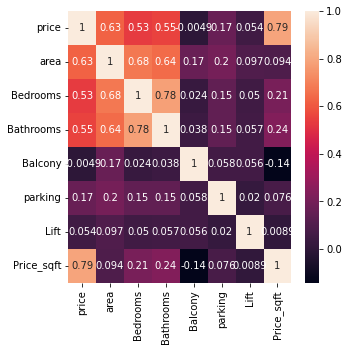

In [909]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))

sns.heatmap(df.corr(),annot=True)

# Cross Validation

In [910]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,X_train, y_train, cv=10).mean()

0.9337074057736874

# Test the Model

In [912]:
X_train.tail(5)

,area,Bedrooms,Bathrooms,Balcony,neworold,parking,Furnished_status,Lift,Price_sqft,City_area
5735,1000.0,2.0,2.0,0.0,Resale,1.0,Semi-Furnished,2.0,20500.000000,Andheri
754,1115.0,2.0,2.0,1.0,Resale,1.0,Unfurnished,2.0,29147.982063,Parel
4080,1662.0,3.0,3.0,1.0,Resale,1.0,Unfurnished,2.0,10529.482551,Goregaon
4909,1200.0,3.0,3.0,0.0,Resale,0.0,Unfurnished,2.0,41666.666667,Bandra
1254,2226.0,3.0,4.0,3.0,Resale,0.0,Semi-Furnished,2.0,17070.979335,Malad


In [913]:
y_train.tail(5)

5735    20500000.0
754     32500000.0
4080    17500000.0
4909    50000000.0
1254    38000000.0
Name: price, dtype: float64

In [914]:
test_inputs = np.array([1000, 2.0, 2.0, 0.0, "Resale", 1.0, "Semi-Furnished", 2.0, 20500, "Andheri"],dtype='object').reshape(1,10)

In [917]:
test_inputs

array([[1000, 2.0, 2.0, 0.0, 'Resale', 1.0, 'Semi-Furnished', 2.0, 20500,
        'Andheri']], dtype=object)

In [919]:
pipe.predict(test_inputs)

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([20122979.44428373])

# Load The Model

In [920]:
import pickle

pickle.dump(pipe,open('pipe3.pkl','wb'))

In [2821]:
pipe = pickle.load(open('pipe.pkl','rb'))

In [699]:
X_train.head()

,area,Bedrooms,Bathrooms,Balcony,neworold,parking,Furnished_status,Lift,Price_sqft,City_area
649,1058.0,2.0,2.0,0.0,1,2.0,1,2.0,11909.262760,3
5886,1200.0,3.0,3.0,1.0,1,1.0,1,2.0,17500.000000,33
4628,1625.0,3.0,3.0,0.0,1,0.0,2,2.0,20923.076923,22
3223,550.0,2.0,2.0,0.0,1,0.0,1,2.0,32727.272727,36
5942,1300.0,3.0,3.0,0.0,1,0.0,1,2.0,13846.153846,1


In [700]:
y_train.head()

649     12600000.0
5886    21000000.0
4628    34000000.0
3223    18000000.0
5942    18000000.0
Name: price, dtype: float64

In [704]:
test_inputs2 = np.array([1058, 2.0, 2.0, 0.0, 1, 2.0, 1, 2.0, 11909, 3],dtype='object').reshape(1,10)

In [705]:
test_inputs2

array([[1058, 2.0, 2.0, 0.0, 1, 2.0, 1, 2.0, 11909, 3]], dtype=object)

In [706]:
pipe.predict(test_inputs2)

c:\users\aniket\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([11822246.05305821])

In [2686]:
df.head()

,price,area,Bedrooms,Bathrooms,Balcony,Lift,parking,neworold,Furnished_status,type_of_building,Price_sqft,City_area
0,22400000.0,629.0,2.0,2.0,1.0,2.0,1.0,0,2,0,35612.082671,7
1,35000000.0,974.0,3.0,2.0,1.0,2.0,1.0,0,2,0,35934.291581,7
2,31700000.0,968.0,3.0,3.0,1.0,2.0,1.0,0,2,0,32747.933884,11
3,18700000.0,629.0,2.0,2.0,2.0,3.0,1.0,0,2,0,29729.729730,12
4,13500000.0,1090.0,2.0,2.0,1.0,2.0,1.0,0,2,0,12385.321101,22


In [2852]:
sorted(df['City_area'].unique())

['Ambernath',
 'Andheri',
 'Bandra',
 'Bhandup',
 'Bhayandar',
 'Borivali',
 'Byculla',
 'Chembur',
 'Chinchpokli',
 'Dadar',
 'Dahisar',
 'Ghatkopar',
 'Goregaon',
 'Govandi',
 'Jogeshwari',
 'Kalyan',
 'Kandivali',
 'Kanjurmarg',
 'Khar',
 'Kurla',
 'Lower Parel',
 'Mahim',
 'Malad',
 'Matunga',
 'Mazgaon',
 'Mira Road',
 'Mulund',
 'Mumbai Central',
 'Nahur',
 'Naigaon',
 'Nalasopara',
 'Navi Mumbai',
 'Parel',
 'Powai',
 'Santacruz',
 'Sewri',
 'Sion',
 'Thane',
 'Tilak Nagar - Harbour Line',
 'Ulhasnagar',
 'Vasai',
 'Vikhroli',
 'Vile Parle',
 'Virar']